In [1]:
import SI_model as si
import matplotlib.pyplot as plt
import network_unpack as nu
import network_manipulation as nm

In [ ]:
'''
workplace_network_1 = build_network('Sociopatterns datasets/workplace_2013.dat')
workplace_network_2 = build_network('Sociopatterns datasets/workplace_2015.dat_')
highschool_network_1 = build_network('Sociopatterns datasets/highschool_2011.csv')
highschool_network_2 = build_network('Sociopatterns datasets/highschool_2012.csv')
highschool_network_3 = build_network('Sociopatterns datasets/highschool_2013.csv')
primaryschool_network_1 = build_network('Sociopatterns datasets/primaryschool_2014.csv')
hospital_network_1 = build_network('Sociopatterns datasets/hospital_2010.dat_')
conference_network_1 = build_network('Sociopatterns datasets/conference_2009.dat_')
'''

In [24]:
dataset_paths = [
'Sociopatterns datasets/conference_2009.dat_',
'Sociopatterns datasets/highschool_2011.csv',
'Sociopatterns datasets/highschool_2012.csv',
'Sociopatterns datasets/highschool_2013.csv',
'Sociopatterns datasets/hospital_2010.dat_',
'Sociopatterns datasets/primaryschool_2014.csv',
'Sociopatterns datasets/workplace_2013.dat',
'Sociopatterns datasets/workplace_2015.dat_']

dataset_names = [
    'Conference 1', 
    'Highschool 1', 
    'Highschool 2', 
    'Highschool 3', 
    'Hospital 1', 
    'Primaryschool 1', 
    'Workplace 1', 
    'Workplace 2']

In [7]:


networks = []

for i in range(len(dataset_paths)):
    networks.append(nu.build_network(dataset_paths[i]))

0
1
2
3
4
5
6
7


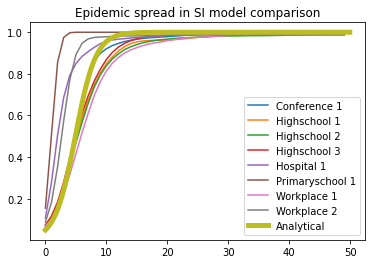

In [13]:
T = 50 # days over which we simulate
I = 0.05 # initial infected fraction
b = 0.6 # transmission rate of contagion
M = 100 # number of runs to smooth model over
threshold = 0.1

c = si.integration_const(I)


#model_SI = si.smooth_SI(N, I, T, M, h, threshold) # takes T as input needs to be consistent with analytical
#model_SI.append(1) # temporary fix to make dimension of x and y match for plotting

models = []
for i in range(len(dataset_names)): 
    model_SI = si.smooth(networks[i], T, I, threshold, M)
    models.append(model_SI)
    print(i)


plt.figure()

t = si.generate_t(T, 1)
for i in range(len(dataset_names)): 
    plt.plot(t, models[i], label = dataset_names[i])

h = 0.1
t = si.generate_t(T, h)
analytic_SI = si.analytic_sol(t, b, c) # should be correct ...
plt.plot(t, analytic_SI, linewidth = 5, label = 'Analytical')

plt.legend(loc = 'lower right')
plt.title('Epidemic spread in SI model comparison')
plt.show()

In [8]:
# Testing network manipulation library part 2

import network_manipulation as nm

path = 'Sociopatterns datasets/conference_2009.dat_'

n = nm.build_network(path)
print(n['1467'])
    
size = nm.find_size(n)
#print(size)

cons = nm.find_connections(n)
#print(cons[0])

strs = nm.find_strengths(n)
#print(strs[0])
    
time = nm.find_time(path)
#print(time)

G = nm.build_nxgraph(path)
print(G['1467'])

# Works as intended alhamdullilah

[['1591', '1513', '1527', '1504', '1531', '1493', '1495', '1477', '1519', '1476', '1529', '1535', '1562', '1700', '1842', '1858', '1769', '1443', '1461', '1644', '1740', '1581', '1572', '1757', '1911', '1711', '1626', '1630', '1761', '1698', '1707', '1441', '1552', '1683', '1825', '1904', '1603', '1905', '1688', '1712', '1458', '1831', '1706', '1566', '1807', '1453', '1582', '1829', '1888', '1805', '1775', '1920', '1835', '1448', '1766', '1428', '1890', '1438', '1692', '1897', '1602', '1791', '1543', '1466', '1427', '1658', '1731', '1877', '1663'], [17, 2, 1, 31, 4, 8, 22, 1, 2, 1, 1, 1, 2, 6, 1, 19, 3, 6, 2, 29, 2, 1, 1, 1, 1, 1, 20, 55, 3, 2, 2, 1, 3, 1, 1, 1, 3, 6, 3, 1, 4, 1, 3, 13, 2, 6, 5, 1, 7, 4, 1, 1, 1, 2, 1, 1, 4, 1, 1, 2, 1, 1, 7, 2, 2, 4, 1, 1, 1]]
{'1591': {'weight': 0.013934426229508197}, '1513': {'weight': 0.001639344262295082}, '1527': {'weight': 0.000819672131147541}, '1504': {'weight': 0.02540983606557377}, '1531': {'weight': 0.003278688524590164}, '1493': {'weight':

In [41]:
import SI_model as si
import network_manipulation as nm

path = 'Sociopatterns datasets/conference_2009.dat_'
G = nm.build_nxgraph(path)
print(G.nodes['1467'])
G = si.initialise_potential(G, 0.5, 5)
print(G.nodes['1467'])

{}
{'potential': 5}


In [48]:
print(list(G.neighbors('1467')))

print(G['1467'])
print(list(G.nodes['1467']))
G.nodes['1467']['potential'] = 0
print(G.nodes['1467'])

print(G.edges['1467', '1591']['weight'])
print(G['1467']['1591']['weight'])



print(list(G['1467'].keys()))

['1591', '1513', '1527', '1504', '1531', '1493', '1495', '1477', '1519', '1476', '1529', '1535', '1562', '1700', '1842', '1858', '1769', '1443', '1461', '1644', '1740', '1581', '1572', '1757', '1911', '1711', '1626', '1630', '1761', '1698', '1707', '1441', '1552', '1683', '1825', '1904', '1603', '1905', '1688', '1712', '1458', '1831', '1706', '1566', '1807', '1453', '1582', '1829', '1888', '1805', '1775', '1920', '1835', '1448', '1766', '1428', '1890', '1438', '1692', '1897', '1602', '1791', '1543', '1466', '1427', '1658', '1731', '1877', '1663']
{'1591': {'weight': 0.013934426229508197}, '1513': {'weight': 0.001639344262295082}, '1527': {'weight': 0.000819672131147541}, '1504': {'weight': 0.02540983606557377}, '1531': {'weight': 0.003278688524590164}, '1493': {'weight': 0.006557377049180328}, '1495': {'weight': 0.018032786885245903}, '1477': {'weight': 0.000819672131147541}, '1519': {'weight': 0.001639344262295082}, '1476': {'weight': 0.000819672131147541}, '1529': {'weight': 0.000819

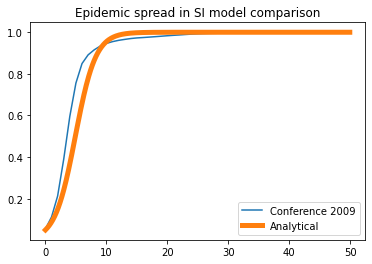

In [2]:
import SI_model as si
import matplotlib.pyplot as plt
import network_unpack as nu
import network_manipulation as nm

T = 50 # days over which we simulate
I = 0.05 # initial infected fraction
b = 0.6 # transmission rate of contagion
M = 100 # number of runs to smooth model over
threshold = 0.1

c = si.integration_const(I)


path = 'Sociopatterns datasets/conference_2009.dat_'
G = nm.build_nxgraph(path)
model_SI = si.smooth(G, I, threshold, T, M)

plt.figure()

t = si.generate_t(T, 1)
plt.plot(t, model_SI, label = 'Conference 2009')

h = 0.1
t = si.generate_t(T, h)
analytic_SI = si.analytic_sol(t, b, c) # should be correct ...
plt.plot(t, analytic_SI, linewidth = 5, label = 'Analytical')

plt.legend(loc = 'lower right')
plt.title('Epidemic spread in SI model comparison')
plt.show()

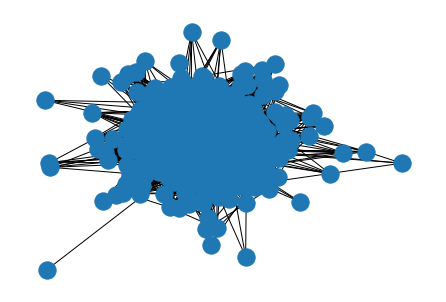

In [5]:
import networkx as nx
nx.draw(G)

Original degree dist
27.134920634920636
12.413736103257563

Log degree dist
3.154230555461861
0.6139656575008389

Generated from log
3.1721687284365827
0.6070876378340009


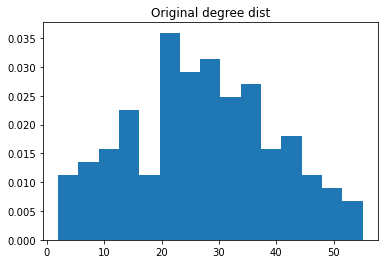

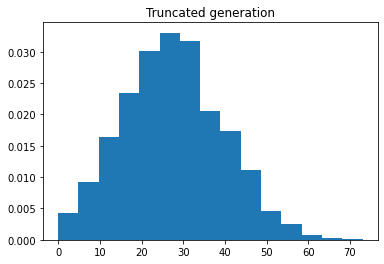

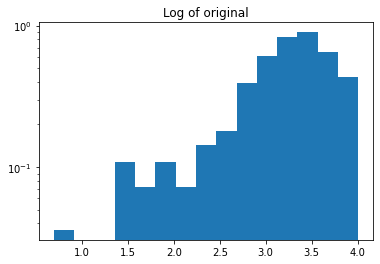

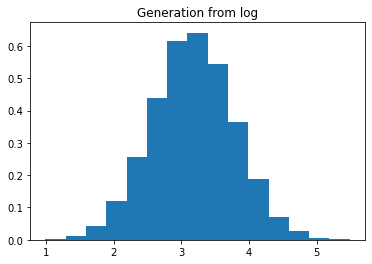

In [42]:
# Testing network manipulation library part 3

import network_manipulation as nm
import matplotlib.pyplot as plt
import numpy as np

path = dataset_paths[1]


n = nm.build_network(path)

dd = nm.degree_dist(n)
#print(dd)

dd_avg, dd_std = nm.degree_dist_stats(dd)
print('Original degree dist')
print(dd_avg)
print(dd_std)
plt.figure()
plt.title('Original degree dist')
plt.hist(dd, bins = 15, density = 1)


gdd = nm.generate_degree_dist(dd_avg, dd_std, 10000)
gdd_avg, gdd_std = nm.degree_dist_stats(gdd)
'''
print('\nGenerated from original')
print(gdd_avg)
print(gdd_std)
plt.figure()
plt.title('Generated from original')
plt.hist(gdd, bins = 20)
'''


gdd.sort()

gdd = np.array(gdd)
gdd = np.rint(gdd)
ind = np.where(gdd == 0)
gdd_truncated = gdd[ind[0][0]:]
plt.figure()
plt.title('Truncated generation')
plt.hist(gdd_truncated, bins = 15, density = 1)



dd_log = np.log(np.array(dd))
dd_log_avg, dd_log_std = nm.degree_dist_stats(dd_log)
print('\nLog degree dist')
print(dd_log_avg)
print(dd_log_std)
plt.figure()
plt.title('Log of original')
plt.yscale('log')
plt.hist(dd_log, bins  = 15, density = 1)


gdd_log = nm.generate_degree_dist(dd_log_avg, dd_log_std, 10000)
gdd_log_avg, gdd_log_std = nm.degree_dist_stats(gdd_log)
print('\nGenerated from log')
print(gdd_log_avg)
print(gdd_log_std)
plt.figure()
plt.title('Generation from log')
plt.hist(gdd_log, bins = 15, density = 1)

def compare_generation():
    '''
    plots and compares different generation methods
    '''
    return True


#Poor matching of generated and original - perhaps test model performance
# and see if there is a difference as if not this solution will still work


In [16]:
type(ind[0][0])


numpy.int64

MODEL V2 IS FAR FAR SUPERIOR LETS GOOOOOOOO

Ask Tim Evans about fixing degree dist problem, 

Look for algorithms to solve problem.

In [45]:
# Testing network visualization library

import network_visualisation as nv

import networkx as nx

bigG = nx.Graph(n)

TypeError: Input is not known type.

Once file has been parsed, use networkx for further manipulation, shouldn't be reinvening the wheel!

In [7]:
d = {1: 'hee', 2: 'hee hee'}
print(d[1])

(t, c) = 2, 5
t += 2
print(t)
print(type(t))

hee
4
<class 'int'>
